# Manifold Learning: S-curve and Swiss Roll

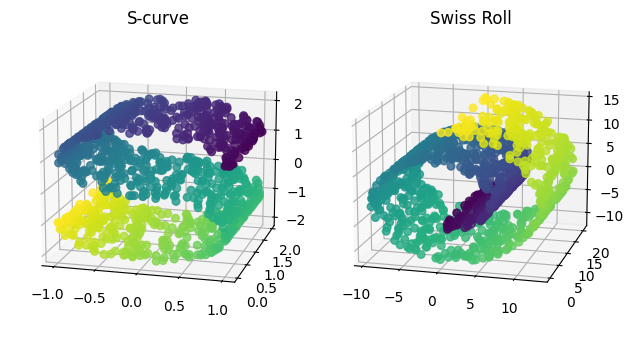

In [1]:
import matplotlib.pyplot as plt
from matplotlib import ticker
from sklearn import manifold, datasets

# Reference: https://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html

def plot_3d(p1, col1, p2, col2):
    x1, y1, z1 = p1.T
    x2, y2, z2 = p2.T

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                                   tight_layout=True,
                                   subplot_kw={"projection": "3d"})
    ax1.scatter(x1, y1, z1, c=col1, s=30, alpha=0.8)
    ax1.view_init(azim=-75, elev=15)
    ax1.set_title('S-curve')
    ax2.scatter(x2, y2, z2, c=col2, s=30, alpha=0.8)
    ax2.view_init(azim=-75, elev=15)
    ax2.set_title('Swiss Roll')
    plt.show()
    
S_points, S_color = datasets.make_s_curve(1200, random_state=0)
R_points, R_color = datasets.make_swiss_roll(1200, random_state=0)
plot_3d(S_points, S_color, R_points, R_color)

## Locally Linear Embedding

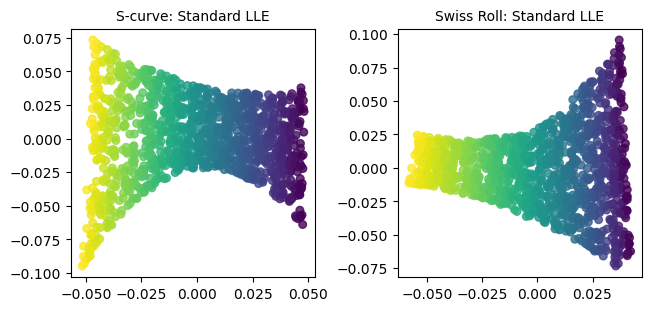

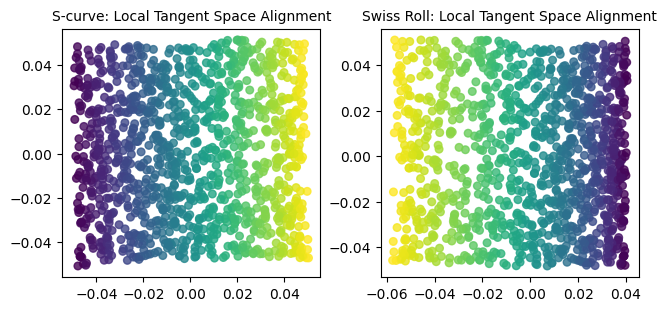

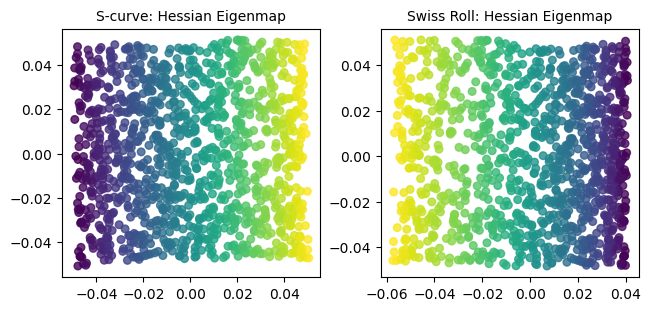

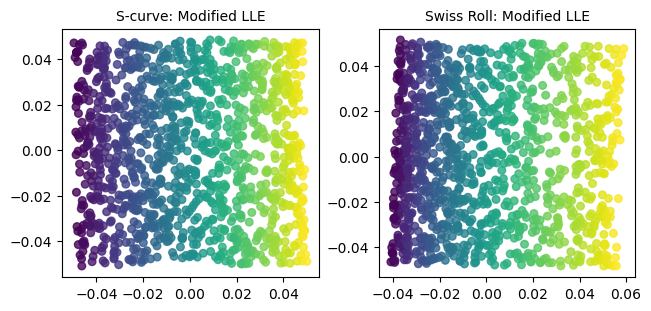

In [2]:
def plot_2d(p1, col1, p2, col2, title):
    x1, y1 = p1.T
    x2, y2 = p2.T
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                                   facecolor="white", 
                                   constrained_layout=True)
    ax1.scatter(x1, y1, c=col1, s=30, alpha=0.8)
    ax1.set_title('S-curve: '+title, size=10)
    ax2.scatter(x2, y2, c=col2, s=30, alpha=0.8)
    ax2.set_title('Swiss Roll: '+title, size=10)
    fig.set_figheight(3)
    plt.show()
    
params = {
    "n_neighbors": 12,
    "n_components": 2,
    "eigen_solver": "auto",
    "random_state": 0,
}

lle_standard = manifold.LocallyLinearEmbedding(method="standard", **params)
S_standard = lle_standard.fit_transform(S_points)
R_standard = lle_standard.fit_transform(R_points)
plot_2d(S_standard, S_color, R_standard, R_color, 'Standard LLE') 

lle_ltsa = manifold.LocallyLinearEmbedding(method="ltsa", **params)
S_ltsa = lle_ltsa.fit_transform(S_points)
R_ltsa = lle_ltsa.fit_transform(R_points)
plot_2d(S_ltsa, S_color, R_ltsa, R_color, 'Local Tangent Space Alignment') 

lle_hessian = manifold.LocallyLinearEmbedding(method="hessian", **params)
S_hessian = lle_hessian.fit_transform(S_points)
R_hessian = lle_hessian.fit_transform(R_points)
plot_2d(S_hessian, S_color, R_hessian, R_color, 'Hessian Eigenmap') 

lle_mod = manifold.LocallyLinearEmbedding(method="modified", **params)
S_mod = lle_mod.fit_transform(S_points)
R_mod = lle_mod.fit_transform(R_points)
plot_2d(S_mod, S_color, R_mod, R_color, 'Modified LLE') 

## Laplacian Eigenmap, Isomap, MDS, and t-SNE
Note: MDS and t-SNE take a bit more time.

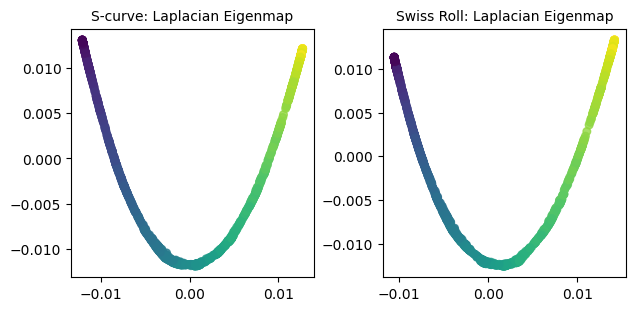

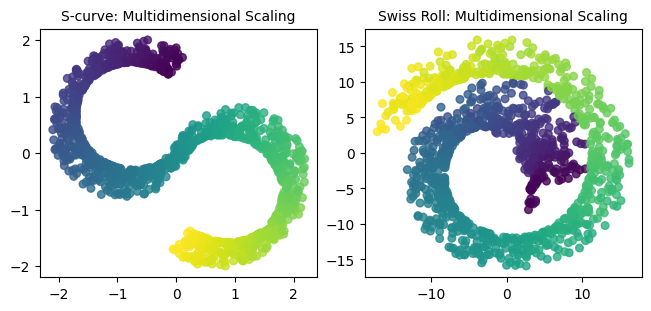

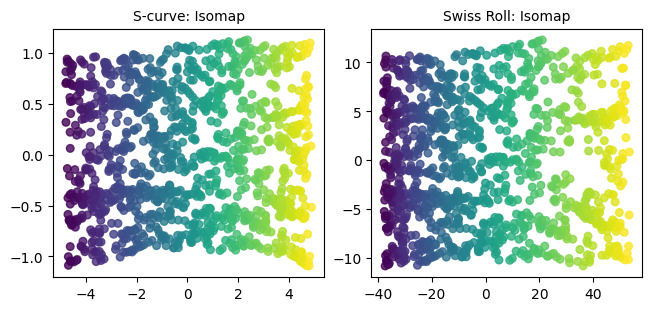

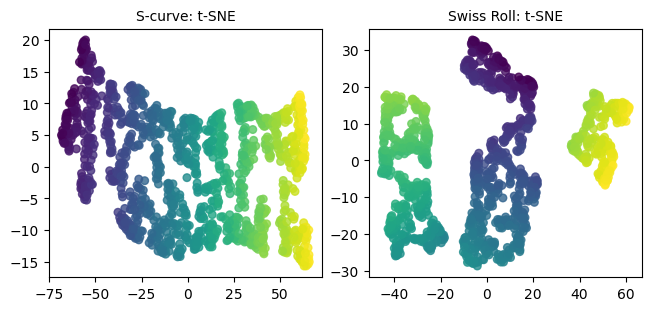

In [3]:
spec = manifold.SpectralEmbedding(n_neighbors=12, n_components=2)
S_spec = spec.fit_transform(S_points)
R_spec = spec.fit_transform(R_points)
plot_2d(S_spec, S_color, R_spec, R_color, 'Laplacian Eigenmap') 

mds = manifold.MDS(metric=True,normalized_stress='auto')
S_mds = mds.fit_transform(S_points)
R_mds = mds.fit_transform(R_points)
plot_2d(S_mds, S_color, R_mds, R_color, 'Multidimensional Scaling') 

iso = manifold.Isomap(n_neighbors=12, n_components=2)
S_iso = iso.fit_transform(S_points)
R_iso = iso.fit_transform(R_points)
plot_2d(S_iso, S_color, R_iso, R_color, 'Isomap') 

tsne = manifold.TSNE()
S_tsne = tsne.fit_transform(S_points)
R_tsne = tsne.fit_transform(R_points)
plot_2d(S_tsne, S_color, R_tsne, R_color, 't-SNE') 